## Step-1 Data loading

In [468]:
! kaggle competitions download -c playground-series-s4e12


  0%|          | 0.00/75.5M [00:00<?, ?B/s]
  1%|▏         | 1.00M/75.5M [00:00<00:14, 5.35MB/s]
  7%|▋         | 5.00M/75.5M [00:00<00:03, 19.7MB/s]
 12%|█▏        | 9.00M/75.5M [00:00<00:02, 26.7MB/s]
 17%|█▋        | 13.0M/75.5M [00:00<00:02, 30.6MB/s]
 23%|██▎       | 17.0M/75.5M [00:00<00:01, 33.3MB/s]
 28%|██▊       | 21.0M/75.5M [00:00<00:01, 34.2MB/s]
 33%|███▎      | 25.0M/75.5M [00:00<00:01, 34.9MB/s]
 38%|███▊      | 29.0M/75.5M [00:00<00:01, 35.2MB/s]
 44%|████▎     | 33.0M/75.5M [00:01<00:01, 35.3MB/s]
 49%|████▉     | 37.0M/75.5M [00:01<00:01, 34.8MB/s]
 54%|█████▍    | 41.0M/75.5M [00:01<00:01, 35.5MB/s]
 60%|█████▉    | 45.0M/75.5M [00:01<00:00, 36.5MB/s]
 65%|██████▍   | 49.0M/75.5M [00:01<00:00, 36.5MB/s]
 70%|███████   | 53.0M/75.5M [00:01<00:00, 37.1MB/s]
 76%|███████▌  | 57.0M/75.5M [00:01<00:00, 37.1MB/s]
 81%|████████  | 61.0M/75.5M [00:01<00:00, 37.4MB/s]
 86%|████████▌ | 65.0M/75.5M [00:02<00:00, 37.0MB/s]
 91%|█████████▏| 69.0M/75.5M [00:02<00:00, 36.4MB/s]
 

In [469]:
import zipfile
import os

def unzip_file_and_delete(zip_file_path, extract_to):
    """
    Unzips a ZIP file to the specified directory and deletes the ZIP file after successful extraction.

    :param zip_file_path: Path to the ZIP file
    :param extract_to: Directory where files should be extracted
    """
    # Check if the file exists
    if not os.path.exists(zip_file_path):
        print(f"Error: The file '{zip_file_path}' does not exist.")
        return

    # Create the output directory if it doesn't exist
    os.makedirs(extract_to, exist_ok=True)

    # Unzipping the file
    try:
        with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
            zip_ref.extractall(extract_to)
        print(f"Files extracted successfully to '{extract_to}'")

        # Delete the zip file after successful extraction
        os.remove(zip_file_path)
        print(f"ZIP file '{zip_file_path}' has been deleted.")
    except zipfile.BadZipFile:
        print(f"Error: '{zip_file_path}' is not a valid ZIP file.")
    except Exception as e:
        print(f"An error occurred: {e}")

# Example usage
zip_file_path = 'playground-series-s4e12.zip' 
extract_to = 'Data'  # Directory to extract the files
unzip_file_and_delete(zip_file_path, extract_to)


Files extracted successfully to 'Data'
ZIP file 'playground-series-s4e12.zip' has been deleted.


In [470]:
import pandas as pd

df_train = pd.read_csv('Data/train.csv')

df_test = pd.read_csv('Data/test.csv')

In [471]:
df_train.shape

(1200000, 21)

In [472]:
df_train.columns

Index(['id', 'Age', 'Gender', 'Annual Income', 'Marital Status',
       'Number of Dependents', 'Education Level', 'Occupation', 'Health Score',
       'Location', 'Policy Type', 'Previous Claims', 'Vehicle Age',
       'Credit Score', 'Insurance Duration', 'Policy Start Date',
       'Customer Feedback', 'Smoking Status', 'Exercise Frequency',
       'Property Type', 'Premium Amount'],
      dtype='object')

In [473]:
df_train.head()

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,...,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
0,0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,...,2.0,17.0,372.0,5.0,2023-12-23 15:21:39.134960,Poor,No,Weekly,House,2869.0
1,1,39.0,Female,31678.0,Divorced,3.0,Master's,NaN,15.569731,Rural,...,1.0,12.0,694.0,2.0,2023-06-12 15:21:39.111551,Average,Yes,Monthly,House,1483.0
2,2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,...,1.0,14.0,NaN,3.0,2023-09-30 15:21:39.221386,Good,Yes,Weekly,House,567.0
3,3,21.0,Male,141855.0,Married,2.0,Bachelor's,NaN,10.938144,Rural,...,1.0,0.0,367.0,1.0,2024-06-12 15:21:39.226954,Poor,Yes,Daily,Apartment,765.0
4,4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,...,0.0,8.0,598.0,4.0,2021-12-01 15:21:39.252145,Poor,Yes,Weekly,House,2022.0


# Step-2 EDA

## Training Data

In [474]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1200000 non-null  int64  
 1   Age                   1181295 non-null  float64
 2   Gender                1200000 non-null  object 
 3   Annual Income         1155051 non-null  float64
 4   Marital Status        1181471 non-null  object 
 5   Number of Dependents  1090328 non-null  float64
 6   Education Level       1200000 non-null  object 
 7   Occupation            841925 non-null   object 
 8   Health Score          1125924 non-null  float64
 9   Location              1200000 non-null  object 
 10  Policy Type           1200000 non-null  object 
 11  Previous Claims       835971 non-null   float64
 12  Vehicle Age           1199994 non-null  float64
 13  Credit Score          1062118 non-null  float64
 14  Insurance Duration    1199999 non-

### AGE

In [475]:
age_stats = df_train['Age'].describe()

# Convert the values to integers
age_stats_int = age_stats.apply(int)

print(age_stats_int)

count    1181295
mean          41
std           13
min           18
25%           30
50%           41
75%           53
max           64
Name: Age, dtype: int64


In [476]:
df_train['Age'].isnull().sum()

np.int64(18705)

In [477]:
df_train['Age'].fillna(df_train['Age'].mean(),inplace=True)

C:\Users\amey9\AppData\Local\Temp\ipykernel_35136\2134080852.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['Age'].fillna(df_train['Age'].mean(),inplace=True)


In [478]:
df_train['Age'].isnull().sum()

np.int64(0)

In [479]:
age_stats = df_train['Age'].describe()

# Convert the values to integers
age_stats_int = age_stats.apply(int)

print(age_stats_int)

count    1200000
mean          41
std           13
min           18
25%           30
50%           41
75%           53
max           64
Name: Age, dtype: int64


### Gender

In [480]:
gender_counts = df_train['Gender'].value_counts()
print(gender_counts)



Gender
Male      602571
Female    597429
Name: count, dtype: int64


In [481]:
df_train['Gender'].isnull().sum()

np.int64(0)

### Annual income

In [482]:
df_train['Annual Income'].isnull().sum()

np.int64(44949)

In [483]:
income_stats = df_train['Annual Income'].describe()

# Convert the values to integers
income_stats_int = income_stats.apply(int)

print(income_stats_int)

count    1155051
mean       32745
std        32179
min            1
25%         8001
50%        23911
75%        44634
max       149997
Name: Annual Income, dtype: int64


In [484]:
df_train['Annual Income'].fillna(df_train['Annual Income'].mean(),inplace=True)

C:\Users\amey9\AppData\Local\Temp\ipykernel_35136\795685172.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['Annual Income'].fillna(df_train['Annual Income'].mean(),inplace=True)


In [485]:
income_stats = df_train['Annual Income'].describe()

# Convert the values to integers
income_stats_int = income_stats.apply(int)

print(income_stats_int)

count    1200000
mean       32745
std        31571
min            1
25%         8646
50%        24996
75%        43936
max       149997
Name: Annual Income, dtype: int64


In [486]:
df_train.columns

Index(['id', 'Age', 'Gender', 'Annual Income', 'Marital Status',
       'Number of Dependents', 'Education Level', 'Occupation', 'Health Score',
       'Location', 'Policy Type', 'Previous Claims', 'Vehicle Age',
       'Credit Score', 'Insurance Duration', 'Policy Start Date',
       'Customer Feedback', 'Smoking Status', 'Exercise Frequency',
       'Property Type', 'Premium Amount'],
      dtype='object')

### Number of Dependents

In [487]:
df_train['Number of Dependents'].isnull().sum()

np.int64(109672)

In [488]:
Number_of_Dependents_stats = df_train['Number of Dependents'].describe()

# Convert the values to integers
Number_of_Dependents_int = Number_of_Dependents_stats.apply(int)

print(Number_of_Dependents_int)

count    1090328
mean           2
std            1
min            0
25%            1
50%            2
75%            3
max            4
Name: Number of Dependents, dtype: int64


In [489]:
median_dependents = df_train['Number of Dependents'].median()
df_train['Number of Dependents'].fillna(median_dependents, inplace=True)


C:\Users\amey9\AppData\Local\Temp\ipykernel_35136\3934236903.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['Number of Dependents'].fillna(median_dependents, inplace=True)


In [490]:
Number_of_Dependents_stats = df_train['Number of Dependents'].describe()

# Convert the values to integers
Number_of_Dependents_int = Number_of_Dependents_stats.apply(int)

print(Number_of_Dependents_int)

count    1200000
mean           2
std            1
min            0
25%            1
50%            2
75%            3
max            4
Name: Number of Dependents, dtype: int64


### Marital Status

In [491]:
df_train.columns

Index(['id', 'Age', 'Gender', 'Annual Income', 'Marital Status',
       'Number of Dependents', 'Education Level', 'Occupation', 'Health Score',
       'Location', 'Policy Type', 'Previous Claims', 'Vehicle Age',
       'Credit Score', 'Insurance Duration', 'Policy Start Date',
       'Customer Feedback', 'Smoking Status', 'Exercise Frequency',
       'Property Type', 'Premium Amount'],
      dtype='object')

In [492]:
df_train['Marital Status'].describe()

count     1181471
unique          3
top        Single
freq       395391
Name: Marital Status, dtype: object

In [493]:
df_train['Marital Status'].isnull().sum()

np.int64(18529)

In [494]:
df_train['Marital Status'].value_counts()

Marital Status
Single      395391
Married     394316
Divorced    391764
Name: count, dtype: int64

In [495]:
# Find the mode (most frequent value)
mode_marital_status = df_train['Marital Status'].mode()[0]

# Fill missing values with the mode
df_train['Marital Status'].fillna(mode_marital_status, inplace=True)


C:\Users\amey9\AppData\Local\Temp\ipykernel_35136\3832824687.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['Marital Status'].fillna(mode_marital_status, inplace=True)


In [496]:
df_train['Marital Status'].value_counts()

Marital Status
Single      413920
Married     394316
Divorced    391764
Name: count, dtype: int64

In [497]:
df_train['Marital Status'].describe()

count     1200000
unique          3
top        Single
freq       413920
Name: Marital Status, dtype: object

### Education Level 

In [498]:
df_train['Education Level'].describe()

count      1200000
unique           4
top       Master's
freq        303818
Name: Education Level, dtype: object

In [499]:
df_train['Education Level'].value_counts()


Education Level
Master's       303818
PhD            303507
Bachelor's     303234
High School    289441
Name: count, dtype: int64

In [500]:
df_train['Education Level'].isnull().sum()

np.int64(0)

### Occupation

In [501]:
df_train['Occupation'].value_counts()

Occupation
Employed         282750
Self-Employed    282645
Unemployed       276530
Name: count, dtype: int64

In [502]:
df_train['Occupation'].isnull().sum()

np.int64(358075)

In [503]:
df_train['Occupation'].describe()

count       841925
unique           3
top       Employed
freq        282750
Name: Occupation, dtype: object

In [504]:
import numpy as np

# Calculate the proportions
proportions = df_train['Occupation'].value_counts(normalize=True)

# Fill missing values by sampling based on proportions
missing_count = df_train['Occupation'].isna().sum()
fill_values = np.random.choice(proportions.index, size=missing_count, p=proportions.values)

# Assign the sampled values to missing positions
df_train.loc[df_train['Occupation'].isna(), 'Occupation'] = fill_values


In [505]:
df_train['Occupation'].isnull().sum()

np.int64(0)

### Health Score

In [506]:
Health_Score_stats = df_train['Health Score'].describe()

# Convert the values to integers
Health_Score_stats_int = Health_Score_stats.apply(int)

print(Health_Score_stats_int)

count    1125924
mean          25
std           12
min            2
25%           15
50%           24
75%           34
max           58
Name: Health Score, dtype: int64


In [507]:
import numpy as np

# Calculate the proportions
proportions = df_train['Health Score'].value_counts(normalize=True)

# Fill missing values by sampling based on proportions
missing_count = df_train['Health Score'].isna().sum()
fill_values = np.random.choice(proportions.index, size=missing_count, p=proportions.values)

# Assign the sampled values to missing positions
df_train.loc[df_train['Health Score'].isna(), 'Health Score'] = fill_values

In [508]:
Health_Score_stats = df_train['Health Score'].describe()

# Convert the values to integers
Health_Score_stats_int = Health_Score_stats.apply(int)

print(Health_Score_stats_int)

count    1200000
mean          25
std           12
min            2
25%           15
50%           24
75%           34
max           58
Name: Health Score, dtype: int64


### Location

In [509]:
Location_stats = df_train['Location'].describe()

print(Location_stats)

count      1200000
unique           3
top       Suburban
freq        401542
Name: Location, dtype: object


In [510]:
df_train['Location'].isnull().sum()

np.int64(0)

In [511]:
df_train['Location'].value_counts()

Location
Suburban    401542
Rural       400947
Urban       397511
Name: count, dtype: int64

### Policy Type

In [512]:
Policy_Type_stats = df_train['Policy Type'].describe()

print(Policy_Type_stats)

count     1200000
unique          3
top       Premium
freq       401846
Name: Policy Type, dtype: object


In [513]:
df_train['Policy Type'].isnull().sum()

np.int64(0)

In [514]:
df_train['Policy Type'].value_counts()

Policy Type
Premium          401846
Comprehensive    399600
Basic            398554
Name: count, dtype: int64

### Previous Claims 

In [515]:
Previous_Claims_stats = df_train['Previous Claims'].describe()
Previous_Claims_stats_int = Previous_Claims_stats.apply(int)

print(Previous_Claims_stats_int)

count    835971
mean          1
std           0
min           0
25%           0
50%           1
75%           2
max           9
Name: Previous Claims, dtype: int64


In [516]:
import numpy as np

# Calculate the proportions
proportions = df_train['Previous Claims'].value_counts(normalize=True)

# Fill missing values by sampling based on proportions
missing_count = df_train['Previous Claims'].isna().sum()
fill_values = np.random.choice(proportions.index, size=missing_count, p=proportions.values)

# Assign the sampled values to missing positions
df_train.loc[df_train['Previous Claims'].isna(), 'Previous Claims'] = fill_values

In [517]:
Previous_Claims_stats = df_train['Previous Claims'].describe()
Previous_Claims_stats_int = Previous_Claims_stats.apply(int)

print(Previous_Claims_stats_int)

count    1200000
mean           1
std            0
min            0
25%            0
50%            1
75%            2
max            9
Name: Previous Claims, dtype: int64


### Vehicle Age

In [518]:
Vehicle_Age_stats = df_train['Vehicle Age'].describe()
Vehicle_Age_stats_int = Vehicle_Age_stats.apply(int)

print(Vehicle_Age_stats_int)

count    1199994
mean           9
std            5
min            0
25%            5
50%           10
75%           15
max           19
Name: Vehicle Age, dtype: int64


In [519]:
import numpy as np

# Calculate the proportions
proportions = df_train['Vehicle Age'].value_counts(normalize=True)

# Fill missing values by sampling based on proportions
missing_count = df_train['Vehicle Age'].isna().sum()
fill_values = np.random.choice(proportions.index, size=missing_count, p=proportions.values)

# Assign the sampled values to missing positions
df_train.loc[df_train['Vehicle Age'].isna(), 'Vehicle Age'] = fill_values

In [520]:
Vehicle_Age_stats = df_train['Vehicle Age'].describe()
Vehicle_Age_stats_int = Vehicle_Age_stats.apply(int)

print(Vehicle_Age_stats_int)

count    1200000
mean           9
std            5
min            0
25%            5
50%           10
75%           15
max           19
Name: Vehicle Age, dtype: int64


### Credit Score

In [521]:
Credit_Score_stats = df_train['Credit Score'].describe()
Credit_Score_stats_int = Credit_Score_stats.apply(int)

print(Credit_Score_stats_int)

count    1062118
mean         592
std          149
min          300
25%          468
50%          595
75%          721
max          849
Name: Credit Score, dtype: int64


In [522]:
import numpy as np

# Calculate the proportions
proportions = df_train['Credit Score'].value_counts(normalize=True)

# Fill missing values by sampling based on proportions
missing_count = df_train['Credit Score'].isna().sum()
fill_values = np.random.choice(proportions.index, size=missing_count, p=proportions.values)

# Assign the sampled values to missing positions
df_train.loc[df_train['Credit Score'].isna(), 'Credit Score'] = fill_values

In [523]:
Credit_Score_stats = df_train['Credit Score'].describe()
Credit_Score_stats_int = Credit_Score_stats.apply(int)

print(Credit_Score_stats_int)

count    1200000
mean         592
std          149
min          300
25%          468
50%          595
75%          721
max          849
Name: Credit Score, dtype: int64


### Insurance Duration 

In [524]:
Insurance_Duration_stats = df_train['Insurance Duration'].describe()
Insurance_Duration_stats_int = Insurance_Duration_stats.apply(int)

print(Insurance_Duration_stats_int)

count    1199999
mean           5
std            2
min            1
25%            3
50%            5
75%            7
max            9
Name: Insurance Duration, dtype: int64


In [525]:
import numpy as np

# Calculate the proportions
proportions = df_train['Insurance Duration'].value_counts(normalize=True)

# Fill missing values by sampling based on proportions
missing_count = df_train['Insurance Duration'].isna().sum()
fill_values = np.random.choice(proportions.index, size=missing_count, p=proportions.values)

# Assign the sampled values to missing positions
df_train.loc[df_train['Insurance Duration'].isna(), 'Insurance Duration'] = fill_values

In [526]:
Insurance_Duration_stats = df_train['Insurance Duration'].describe()
Insurance_Duration_stats_int = Insurance_Duration_stats.apply(int)

print(Insurance_Duration_stats_int)

count    1200000
mean           5
std            2
min            1
25%            3
50%            5
75%            7
max            9
Name: Insurance Duration, dtype: int64


### Customer Feedback 

In [527]:
Customer_Feedback_stats = df_train['Customer Feedback'].describe()

print(Customer_Feedback_stats)

count     1122176
unique          3
top       Average
freq       377905
Name: Customer Feedback, dtype: object


In [528]:
df_train['Customer Feedback'].value_counts()

Customer Feedback
Average    377905
Poor       375518
Good       368753
Name: count, dtype: int64

In [529]:
import numpy as np

# Calculate the proportions
proportions = df_train['Customer Feedback'].value_counts(normalize=True)

# Fill missing values by sampling based on proportions
missing_count = df_train['Customer Feedback'].isna().sum()
fill_values = np.random.choice(proportions.index, size=missing_count, p=proportions.values)

# Assign the sampled values to missing positions
df_train.loc[df_train['Customer Feedback'].isna(), 'Customer Feedback'] = fill_values

In [530]:
df_train['Customer Feedback'].value_counts()

Customer Feedback
Average    404163
Poor       401419
Good       394418
Name: count, dtype: int64

In [531]:
Customer_Feedback_stats = df_train['Customer Feedback'].describe()

print(Customer_Feedback_stats)

count     1200000
unique          3
top       Average
freq       404163
Name: Customer Feedback, dtype: object


## Test Data

In [532]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800000 entries, 0 to 799999
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    800000 non-null  int64  
 1   Age                   787511 non-null  float64
 2   Gender                800000 non-null  object 
 3   Annual Income         770140 non-null  float64
 4   Marital Status        787664 non-null  object 
 5   Number of Dependents  726870 non-null  float64
 6   Education Level       800000 non-null  object 
 7   Occupation            560875 non-null  object 
 8   Health Score          750551 non-null  float64
 9   Location              800000 non-null  object 
 10  Policy Type           800000 non-null  object 
 11  Previous Claims       557198 non-null  float64
 12  Vehicle Age           799997 non-null  float64
 13  Credit Score          708549 non-null  float64
 14  Insurance Duration    799998 non-null  float64
 15  

In [533]:
df_test.shape

(800000, 20)

In [534]:
import numpy as np
import pandas as pd

def fill_missing_values_with_proportion(df, columns):
    """
    Fills missing values in the specified columns of a DataFrame 
    by sampling from the existing value distribution of each column.
    
    Parameters:
        df (pd.DataFrame): The DataFrame with missing values.
        columns (list): List of column names to fill missing values.
    
    Returns:
        pd.DataFrame: The DataFrame with missing values filled proportionally.
    """
    for col in columns:
        if df[col].isna().sum() > 0:  # Proceed only if there are missing values
            proportions = df[col].value_counts(normalize=True)
            missing_count = df[col].isna().sum()
            fill_values = np.random.choice(proportions.index, size=missing_count, p=proportions.values)
            df.loc[df[col].isna(), col] = fill_values
    return df


In [535]:
df_test.columns

Index(['id', 'Age', 'Gender', 'Annual Income', 'Marital Status',
       'Number of Dependents', 'Education Level', 'Occupation', 'Health Score',
       'Location', 'Policy Type', 'Previous Claims', 'Vehicle Age',
       'Credit Score', 'Insurance Duration', 'Policy Start Date',
       'Customer Feedback', 'Smoking Status', 'Exercise Frequency',
       'Property Type'],
      dtype='object')

In [536]:
columns_to_fill = ['Age', 'Annual Income', 'Marital Status',
       'Number of Dependents', 'Occupation', 'Health Score',
       'Previous Claims', 'Vehicle Age','Credit Score', 'Insurance Duration', 
       'Customer Feedback']

# Fill missing values proportionally
df_test = fill_missing_values_with_proportion(df_test, columns_to_fill)

print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800000 entries, 0 to 799999
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    800000 non-null  int64  
 1   Age                   800000 non-null  float64
 2   Gender                800000 non-null  object 
 3   Annual Income         800000 non-null  float64
 4   Marital Status        800000 non-null  object 
 5   Number of Dependents  800000 non-null  float64
 6   Education Level       800000 non-null  object 
 7   Occupation            800000 non-null  object 
 8   Health Score          800000 non-null  float64
 9   Location              800000 non-null  object 
 10  Policy Type           800000 non-null  object 
 11  Previous Claims       800000 non-null  float64
 12  Vehicle Age           800000 non-null  float64
 13  Credit Score          800000 non-null  float64
 14  Insurance Duration    800000 non-null  float64
 15  

# Step-3 Data pre-processing

In [537]:
from sklearn.preprocessing import LabelEncoder


# Select columns with object data type
object_columns = df_train.select_dtypes(include=['object']).columns

# Apply Label Encoding to object columns
label_encoders = {}  # Store label encoders for each column
for col in object_columns:
    le = LabelEncoder()
    df_train[col] = le.fit_transform(df_train[col])  # Transform the column
    label_encoders[col] = le            # Save the encoder for future use

print(df_train)

              id   Age  Gender  Annual Income  Marital Status  \
0              0  19.0       0   10049.000000               1   
1              1  39.0       0   31678.000000               0   
2              2  23.0       1   25602.000000               0   
3              3  21.0       1  141855.000000               1   
4              4  21.0       1   39651.000000               2   
...          ...   ...     ...            ...             ...   
1199995  1199995  36.0       0   27316.000000               1   
1199996  1199996  54.0       1   35786.000000               0   
1199997  1199997  19.0       1   51884.000000               0   
1199998  1199998  55.0       1   32745.217777               2   
1199999  1199999  21.0       0   32745.217777               0   

         Number of Dependents  Education Level  Occupation  Health Score  \
0                         1.0                0           1     22.598761   
1                         3.0                2           0     15.5

from 

In [538]:
df_train.corr()['Premium Amount']

id                     -0.000292
Age                    -0.002411
Gender                  0.000161
Annual Income          -0.012091
Marital Status          0.003021
Number of Dependents   -0.000947
Education Level        -0.001121
Occupation             -0.000492
Health Score            0.014023
Location                0.001059
Policy Type            -0.000884
Previous Claims         0.033454
Vehicle Age             0.000391
Credit Score           -0.023186
Insurance Duration     -0.000028
Policy Start Date      -0.010087
Customer Feedback       0.002203
Smoking Status          0.000163
Exercise Frequency     -0.001098
Property Type          -0.001222
Premium Amount          1.000000
Name: Premium Amount, dtype: float64

In [562]:
df_train.columns

Index(['id', 'Age', 'Gender', 'Annual Income', 'Marital Status',
       'Number of Dependents', 'Education Level', 'Occupation', 'Health Score',
       'Location', 'Policy Type', 'Previous Claims', 'Vehicle Age',
       'Credit Score', 'Insurance Duration', 'Policy Start Date',
       'Customer Feedback', 'Smoking Status', 'Exercise Frequency',
       'Property Type', 'Premium Amount'],
      dtype='object')

In [563]:
X = df_train[['Age', 'Gender', 'Annual Income', 'Marital Status',
       'Number of Dependents', 'Education Level', 'Occupation', 'Health Score',
       'Location', 'Policy Type', 'Previous Claims',
       'Credit Score', 'Insurance Duration', 'Policy Start Date',
       'Customer Feedback', 'Smoking Status', 'Exercise Frequency',
       'Property Type', 'Premium Amount']]
y = df_train['Premium Amount']

In [564]:
X.shape

(1200000, 19)

In [565]:
y.shape

(1200000,)

In [566]:
y = y.astype(int)

In [567]:
print(y.isnull().sum())  # Check for missing values

0


In [568]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [569]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (960000, 19)
X_test shape: (240000, 19)
y_train shape: (960000,)
y_test shape: (240000,)


In [570]:
! pip install xgboost

In [571]:
from xgboost import XGBRegressor

model = XGBRegressor(n_jobs = -1,
                     eval_metric="rmsle",
                     n_estimators=200,
                     learning_rate=0.1,
                     max_depth=6,
                     objective='reg:squarederror',
                     random_state=2
)

model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric='rmsle', feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=-1,
             num_parallel_tree=None, random_state=2, ...)

In [572]:
y_pred = model.predict(X_test)

In [573]:
model.intercept_

array([1102.5055], dtype=float32)

In [574]:
# performance metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)

In [575]:
print(f"MSE:{round(mse,2)},\nMAE:{round(mae,2)},\nRMSE:{round(rmse,2)}")

MSE:282.35,
MAE:4.94,
RMSE:16.8


In [576]:
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred)

In [577]:
score

0.9996221661567688

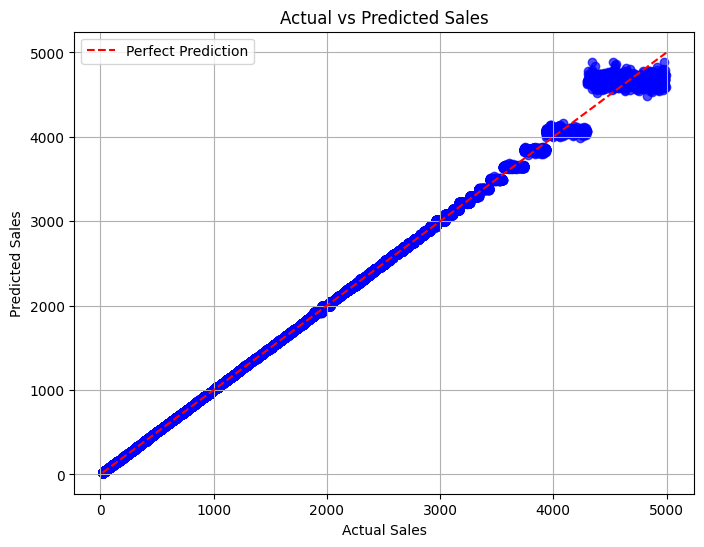

In [578]:
import matplotlib.pyplot as plt
# Scatter plot of actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label="Perfect Prediction")
plt.title("Actual vs Predicted Sales")
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.legend()
plt.grid(True)
plt.show()

In [579]:
from sklearn.metrics import mean_squared_log_error

rmsle = np.sqrt(mean_squared_log_error(y_test, y_pred))
print("RMSLE:", rmsle)

RMSLE: 0.0104568192518153


In [582]:
check = df_test[[ 'Age', 'Gender', 'Annual Income', 'Marital Status',
       'Number of Dependents', 'Education Level', 'Occupation', 'Health Score',
       'Location', 'Policy Type', 'Previous Claims',
       'Credit Score', 'Insurance Duration', 'Policy Start Date',
       'Customer Feedback', 'Smoking Status', 'Exercise Frequency',
       'Property Type']]

In [583]:
check

,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type
0,28.0,Female,2310.0,Single,4.0,Bachelor's,Self-Employed,7.657981,Rural,Basic,0.0,598.0,1.0,2023-06-04 15:21:39.245086,Poor,Yes,Weekly,House
1,31.0,Female,126031.0,Married,2.0,Master's,Self-Employed,13.381379,Suburban,Premium,0.0,372.0,8.0,2024-04-22 15:21:39.224915,Good,Yes,Rarely,Apartment
2,47.0,Female,17092.0,Divorced,0.0,PhD,Unemployed,24.354527,Urban,Comprehensive,2.0,819.0,9.0,2023-04-05 15:21:39.134960,Average,Yes,Monthly,Condo
3,28.0,Female,30424.0,Divorced,3.0,PhD,Self-Employed,5.136225,Suburban,Comprehensive,1.0,770.0,5.0,2023-10-25 15:21:39.134960,Poor,Yes,Daily,House
4,24.0,Male,10863.0,Divorced,2.0,High School,Unemployed,11.844155,Suburban,Premium,2.0,755.0,7.0,2021-11-26 15:21:39.259788,Average,No,Weekly,House
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799995,50.0,Female,38782.0,Married,1.0,Bachelor's,Self-Employed,14.498639,Rural,Premium,0.0,309.0,2.0,2021-07-09 15:21:39.184157,Average,Yes,Daily,Condo
799996,63.0,Female,73462.0,Single,0.0,Master's,Unemployed,8.145748,Rural,Basic,2.0,658.0,2.0,2023-03-28 15:21:39.250151,Good,No,Daily,Apartment
799997,26.0,Female,35178.0,Single,0.0,Master's,Employed,6.636583,Urban,Comprehensive,1.0,742.0,6.0,2019-09-30 15:21:39.132191,Poor,No,Monthly,Apartment
799998,34.0,Female,45661.0,Single,3.0,Master's,Unemployed,15.937248,Urban,Premium,2.0,467.0,7.0,2022-05-09 15:21:39.253660,Average,No,Weekly,Condo


In [584]:
from sklearn.preprocessing import LabelEncoder


# Select columns with object data type
object_columns = check.select_dtypes(include=['object']).columns

# Apply Label Encoding to object columns
label_encoders = {}  # Store label encoders for each column
for col in object_columns:
    le = LabelEncoder()
    check[col] = le.fit_transform(check[col])  # Transform the column
    label_encoders[col] = le            # Save the encoder for future use

print(check)

C:\Users\amey9\AppData\Local\Temp\ipykernel_35136\3244161012.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  check[col] = le.fit_transform(check[col])  # Transform the column
C:\Users\amey9\AppData\Local\Temp\ipykernel_35136\3244161012.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  check[col] = le.fit_transform(check[col])  # Transform the column
C:\Users\amey9\AppData\Local\Temp\ipykernel_35136\3244161012.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

         Age  Gender  Annual Income  Marital Status  Number of Dependents  \
0       28.0       0         2310.0               2                   4.0   
1       31.0       0       126031.0               1                   2.0   
2       47.0       0        17092.0               0                   0.0   
3       28.0       0        30424.0               0                   3.0   
4       24.0       1        10863.0               0                   2.0   
...      ...     ...            ...             ...                   ...   
799995  50.0       0        38782.0               1                   1.0   
799996  63.0       0        73462.0               2                   0.0   
799997  26.0       0        35178.0               2                   0.0   
799998  34.0       0        45661.0               2                   3.0   
799999  25.0       1        24843.0               0                   3.0   

        Education Level  Occupation  Health Score  Location  Policy Type  \

C:\Users\amey9\AppData\Local\Temp\ipykernel_35136\3244161012.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  check[col] = le.fit_transform(check[col])  # Transform the column
C:\Users\amey9\AppData\Local\Temp\ipykernel_35136\3244161012.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  check[col] = le.fit_transform(check[col])  # Transform the column


In [585]:
y_pred_2 = model.predict(check)

ValueError: feature_names mismatch: ['Age', 'Gender', 'Annual Income', 'Marital Status', 'Number of Dependents', 'Education Level', 'Occupation', 'Health Score', 'Location', 'Policy Type', 'Previous Claims', 'Credit Score', 'Insurance Duration', 'Policy Start Date', 'Customer Feedback', 'Smoking Status', 'Exercise Frequency', 'Property Type', 'Premium Amount'] ['Age', 'Gender', 'Annual Income', 'Marital Status', 'Number of Dependents', 'Education Level', 'Occupation', 'Health Score', 'Location', 'Policy Type', 'Previous Claims', 'Credit Score', 'Insurance Duration', 'Policy Start Date', 'Customer Feedback', 'Smoking Status', 'Exercise Frequency', 'Property Type']
expected Premium Amount in input data

In [586]:
y_pred_2.shape

(800000,)

In [587]:
import pandas as pd

ids = df_test['id']

# Assuming y_pred contains the predictions
# Create a DataFrame from the predictions
predictions_df = pd.DataFrame({'id': ids,'Premium Amount': y_pred_2})

# Save the DataFrame to a CSV file
predictions_df.to_csv('predictions.csv', index=False)

print("Predictions saved to predictions.csv")


Predictions saved to predictions.csv
